In [1]:
import numpy as np
import matplotlib.pyplot as plt
#np.set_printoptions(suppress=True)

data_path = "/Users/loicnachtergaele/mnist_neural-main/"
test = data_path + "mnist_train.csv"
train_data = np.loadtxt(data_path + "mnist_train.csv", 
                        delimiter=",")
test_data = np.loadtxt(data_path + "mnist_test.csv", 
                       delimiter=",") 
test_data[:10]

array([[7., 0., 0., ..., 0., 0., 0.],
       [2., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       ...,
       [9., 0., 0., ..., 0., 0., 0.],
       [5., 0., 0., ..., 0., 0., 0.],
       [9., 0., 0., ..., 0., 0., 0.]])

Populating the interactive namespace from numpy and matplotlib


/usr/local/lib/python3.9/site-packages/IPython/core/magics/pylab.py:159: UserWarning: pylab import has clobbered these variables: ['test']
`%matplotlib` prevents importing * from pylab and numpy
  warn("pylab import has clobbered these variables: %s"  % clobbered +


(60000, 784)


(<matplotlib.image.AxesImage at 0x129583700>, array([6.]))

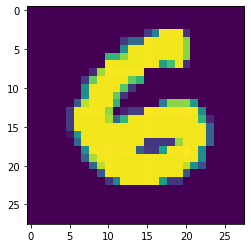

In [2]:
%pylab inline
import random
ran = random.randint(0,len(train_data))
fac = 0.99 / 255
train_imgs = np.asfarray(train_data[:, 1:]) * fac + 0.01
test_imgs = np.asfarray(test_data[:, 1:]) * fac + 0.01
print(train_imgs.shape)
train_labels = np.asfarray(train_data[:, :1])
test_labels = np.asfarray(test_data[:, :1])

test = train_imgs[ran].reshape((28,28))

imshow(test),train_labels[ran]


In [11]:
l1 = train_imgs.shape[1]
l2 = 128
l3 = 10

w1_shape = (l1,l2)
w2_shape = (l2,l3)

w1 = np.random.uniform(-1,1,w1_shape)/np.sqrt(l1)
w2 = np.random.uniform(-1,1,w2_shape)/np.sqrt(l2)
test1 = w1
test2 =w2
#print(w2[0])
#define all biasees with 0
b1 = np.full(l2,0,dtype="float64")
b2 = np.full(l3,0,dtype="float64")
print("w1: ",w1.shape," w2: ",w2.shape)
testb1 = b1
testb2 = b2
print("b1: ",b1.shape," b2: ",b2.shape)
#use this for the last layer
def sigmoid(x):
    return 1/(1+np.exp(-x))

#use this for the first layer
def relu(x):
    return np.maximum(0,x)

def softmax(x):
    expo = np.exp(x)
    expo_sum = np.sum(np.exp(x))
    return expo/expo_sum
def logsumexp(x):
  #return np.log(np.exp(x).sum(axis=1))
  # http://gregorygundersen.com/blog/2020/02/09/log-sum-exp/
  c = x.max(axis=1)
  return c + np.log(np.exp(x-c.reshape((-1, 1))).sum(axis=1))

l1,l2,l3
train_labels.shape
train_labels
w1[0]
w2[1]

w1:  (784, 128)  w2:  (128, 10)
b1:  (128,)  b2:  (10,)


array([-0.03895931,  0.05100867, -0.0421679 , -0.01280435, -0.03478977,
        0.06622107,  0.07333901,  0.08730499, -0.04644147, -0.06335729])

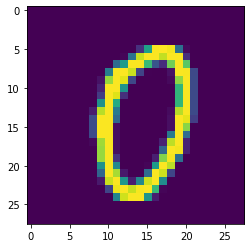

1


In [4]:
def forward_prop(img):
    
    #flatten the img data
    x = img.flatten()/255
    #print(w1.shape,b1.shape)
    first_layer = np.dot(x,w1)+b1
    first_layer_activation = relu(first_layer)
    
    #y is youre labels aka 0123456789
    second_layer  = np.dot(first_layer_activation,w2) + b2
    #print(y.shape)
    
    #exp_y = np.exp(second_layer)
    #second_layer_activation = exp_y / exp_y.sum()
    #second_layer_activation = softmax(second_layer)
    second_layer_activation = sigmoid(second_layer)
    return x,first_layer,first_layer_activation,second_layer,second_layer_activation


def loss(second_layer_activation,the_label):
    #print("yes: ",second_layer_activation[int(the_label)])
    return -np.log(second_layer_activation[int(the_label)])


def numpy_eval():
  Y_test_preds_out = forward(test_imgs.reshape((-1, 28*28)))
  Y_test_preds = np.argmax(Y_test_preds_out, axis=1)
  return (test_labels == Y_test_preds).mean()

    
#print(ya,"\n\n",test3)
x, first_layer,first_layer_activation,second_layer,second_layer_activation = forward_prop(train_imgs[1000])

plt.imshow(x.reshape((28,28)))
plt.show()


print(second_layer_activation.argmax())

In [5]:
iters = 1000
lr = 1
bz = 32
n_tests = 500

this one is being changed: [5.] 0.6000323600080668
this one is being changed: [0.] 0.47731906529757384
this one is being changed: [4.] 0.3013824649179222
this one is being changed: [1.] 0.17894416835156152
this one is being changed: [9.] 0.12621734807111312
this one is being changed: [2.] 0.10817236926596142
this one is being changed: [1.] 0.10185928909190095
this one is being changed: [3.] 0.1007565398608751
this one is being changed: [1.] 0.10011538240766124
this one is being changed: [4.] 0.1000370824171104
this one is being changed: [6.] 0.10002096312777506
this one is being changed: [9.] 0.1000115535628075
this one is being changed: [0.] 0.10001108028865777
this one is being changed: [5.] 0.10001374672109427
this one is being changed: [6.] 0.10001404765432359
this one is being changed: [0.] 0.10000820621575168
this one is being changed: [7.] 0.10002093671428992
this one is being changed: [6.] 0.1000077049360144
this one is being changed: [1.] 0.10000584754738598
this one is being 

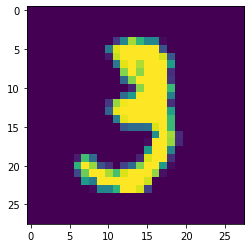

In [6]:
#def backpropagation(x,h,ha,ya,t):d
"""
            dw = (1/m) * np.dot(X, (A-Y).T)
            db = (1/m) * np.sum(A-Y)"""
def backpropagation(x,first_layer,first_layer_activation,second_layer_activation,the_label):
    d_b2 = second_layer_activation
    m = train_imgs.shape[1]
    #print(d_b2[1])
    #print(d_b2)
    #A = sigmoid(np.dot(train_imgs,w1)+b1)
    #print(A.shape,w1.shape)
    ######## here you changhe the bias to optimize it
    d_b2[int(the_label)] += 0.1
    print("this one is being changed: {}".format(the_label),d_b2[int(the_label)])
    #print("this is with it added: ",d_b2)
    #print(d_b2)
    
    #d_b1 = (1/m) * np.sum(first_layer_activation - train_labels)
    d_w2 = np.outer(first_layer_activation,d_b2)
    #d_w2 = np.dot(first_layer_activation,w2) + b2
    #print("in the back_prop: ",d_w2[0])
    #print("w2.shape: ",w2.shape,"d_b2.shape: ",d_b2.shape)
    d_b1 = np.dot(w2,d_b2) *first_layer_activation *(1-first_layer_activation)
    #d_b1 = (1/m)*np.sum(second_layer_activation-the_label)
    #print("!!!!!d_b2.shape: ",d_b2.shape)
    #print("!!!!!w2: ",w2.shape)
    #print("!!!!!ha.shape: ",ha.shape)

    d_w1 = np.outer(x,d_b1)
    #print(d_w1.shape)
    return d_w1, d_w2,d_b1,d_b2
los = []
def train(iterations,batch_size):
    #for k in range(iterations):
    for k in range(3):
        sum_d_w1 = np.zeros(w1_shape)
        sum_d_w2 = np.zeros(w2_shape)
        sum_d_b1 = np.zeros(l2)
        #print("sum_d_b1 up here : ",sum_d_b1.shape)
        sum_d_b2 = np.zeros(l3)
        #print("sum_d_w1.shape: ",sum_d_w1.shape)
        #print("sum_d_w2.shape: ",sum_d_w2.shape)
        #print("sum_d_b1.shape: ",sum_d_b1.shape)
        #print("sum_d_b2.shape: ",sum_d_b2.shape)
        #print("??",sum_d_b1)
        #print("??",sum_d_b2)

        #print("sum_d_w1.shape.resize((128,0)): ",sum_d_b1.shape)
        #for i in range(batch_size):
        for i in range(10):
            index = k * batch_size + i
            #print("this is index: ", index)
            
            try:
                image = train_imgs[index]
                the_label = train_labels[index]
            except:
                image = train_imgs[-k]
                the_label = train_labels[-k]
            
            x,first_layer,first_layer_activation,second_layer,second_layer_activation = forward_prop(image)
            d_w1,d_w2,d_b1,d_b2 = backpropagation(x,first_layer,first_layer_activation,second_layer_activation,the_label)
            los.append(loss(second_layer_activation,the_label))
            #print("%%",d_b1)
            #print("important : d_b1.shape: ",d_b1.shape )
            #print("2d_w1.shape: ",d_w1.shape)
            #print("2d_w2.shape: ",d_w2.shape) 
            #print("2d_b1.shape: ",d_b1.shape) 
            #print("2d_b2.shape: ",d_b2.shape)
            #print(d_b2)
            sum_d_w1 += d_w1
            sum_d_w2 += d_w2
            #print("\n d_w2: ",d_w2[0])
            #print("\nthis is sum_d_w2 in the other {}:\n ".format(i), sum_d_w2[0])
            #sum_d_w2.shape = (128,10)
            #d_b2.shape = (10,)
            #print("d_w1: ",sum_d_w1.shape," += ",d_w1.shape)
            #print("d_b1: ",sum_d_b1.shape," += ",d_b1.shape)
            #print("d_b2: ",sum_d_b2.shape," += ",d_b2.shape)
            #sum_d_b1 should be 128
            sum_d_b1 += d_b1
            sum_d_b2 += d_b2
            w1[:] -= lr * sum_d_w1
            #print(w2[0])
            w2[:] -= lr * sum_d_w2
            #print("this is w2: ",w2[0])
            b1[:] -= lr * sum_d_b1
            b2[:] -= lr * sum_d_b2
            
    #print(b1.dtype,sum_d_b1.dtype)
    #gradient descent implementation
    """
    w1[:] -= lr * sum_d_w1
    #print(w2[0])
    print("sum_d_b2: ",sum_d_b2)
    w2[:] -= lr * sum_d_w2
    b1[:] -= lr * sum_d_b1
    b2[:] -= lr * sum_d_b2"""
    print(b2.shape)
    return los
def test():
    result = []
    for i in range(n_tests):
        img = test_imgs[i]
        label = test_labels[i]
        x, first_layer,first_layer_activation,second_layer,second_layer_activation = forward_prop(img)
        result.append(second_layer_activation.argmax())
    return result

def accuracy(result):
    acc = 0
    for i in range(n_tests):
        if result[i] == test_labels[i]:
            acc += 1
    return acc / n_tests

los = train(iters,bz)
result = test()
print(result)
acc1 = accuracy(result)
print("test acc: ",acc1)   
x, first_layer, first_layer_activation, second_layer,second_layer_activation = forward_prop(train_imgs[10])


#plt.imshow(train_imgs[0].reshape((28,28)))
plt.imshow(x.reshape((28,28)))

#print(los[:10])
#plot(loss,c="red")


In [8]:
x, first_layer, first_layer_activation, second_layer,second_layer_activation = forward_prop(train_imgs[1])
print(second_layer_activation.argmax())
print(second_layer_activation,"\n\n\n",b2/255)


8
[1.00305625e-06 1.30429312e-06 1.27017587e-05 1.54810919e-05
 3.42266696e-06 2.76968902e-06 1.27127265e-06 1.03782471e-05
 1.88883159e-05 4.69156381e-06] 


 [-0.05415353 -0.05313581 -0.04420308 -0.04342168 -0.04934445 -0.05017666
 -0.05322498 -0.04499863 -0.04265056 -0.04811112]
